# IMPORTS

In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###--------- PANDAS - EXIBIR TODAS COLUNAS ----###

pd.set_option('display.max_columns', None)


###--------- ESTILIZAÇÃO DO NOTEBOOK ---------###

from IPython.core.display import display, HTML

# retira a margem do notebook
display(HTML("<style>.container { width:100% !important; }</style>"))

# font do texto markdown
display(HTML("<style>h1 { font-size:24px !important; }</style>"))
display(HTML("<style>h2 { font-size:23px !important; }</style>"))
display(HTML("<style>h3 { font-size:22px !important; }</style>"))
display(HTML("<style>h4 { font-size:21px !important; }</style>"))
display(HTML("<style>p { font-size:18px !important; }</style>"))

# tamanho da fonte da tabela
display(HTML("<style>th { font-size:17px !important; }</style>"))
display(HTML("<style>td { font-size:17px !important; }</style>"))

# font do codigo 
display(HTML("<style>span { font-size:18px !important; }</style>"))

# DATA

In [43]:
# mean, std, quantity
idade = np.random.normal(20, 5, 1000)
altura = np.random.normal(1.60, 0.01, 1000)
categoria = np.random.randint(2, size=1000)
categoria = categoria.astype(int)
categoria2 = np.random.randint(1, size=950)
categoria2 = np.append(categoria2, np.random.randint(2,size=50))
categoria3 = np.arange(0,1000, 10) 

ano = []
for i in range(1000):
    ano.append( i // 10 + 1900)

valor_compra = np.random.normal(150, 30, 1000)

altura_brasil = np.random.normal(1.75, 0.03, 1000)
altura_eua = np.random.normal(1.77, 0.03, 1000)

# DataFrame 1d
df = pd.DataFrame([idade, altura, categoria, categoria2, categoria3, ano, valor_compra], index=['idade','altura','categoria', 'categoria2', 'categoria3', 'ano', 'valor_compra']).T 

# 1. VARIÁVEIS NUMÉRICAS

## 1.1. DISTRIBUIÇÃO DE VARIÁVEIS NUMÉRICAS

### 1.1.1 HISTOGRAMAS

**PANDAS**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

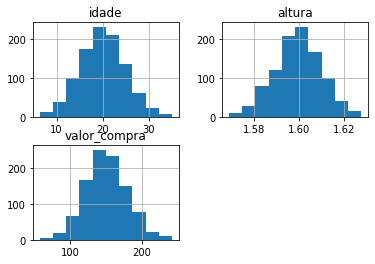

In [71]:
num_data = df[['idade','altura','valor_compra']]

num_data.hist();

**SEABORN**

https://seaborn.pydata.org/generated/seaborn.histplot.html

#### HISTOGRAMA SIMPLES

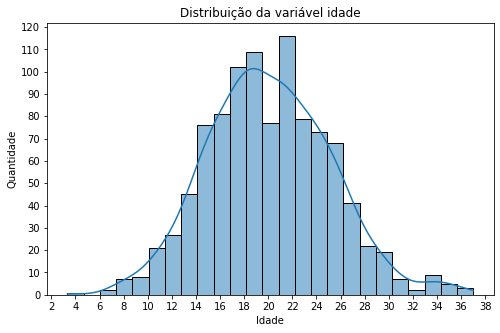

In [15]:
# tamanho do plot
plt.figure(figsize=(8,5))

# título do plot
plt.title('Distribuição da variável idade')

# labels do eixo x 
plt.xticks(np.arange(0,40,2))

# labels do eixo y
plt.yticks(np.arange(0,190,10))

# Nomes dos eixos
# eixo x
plt.xlabel('Idade')
# eixo y
plt.ylabel('Quantidade')

sns.histplot(data=idade, kde=True);

#### HISTOGRAMA COM SOBREPOSIÇÃO

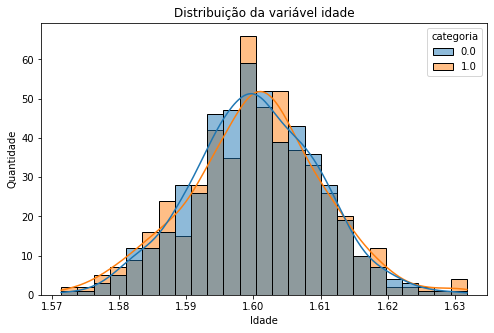

In [16]:
# tamanho do plot
plt.figure(figsize=(8,5))

# título do plot
plt.title('Distribuição da variável idade')

# Nomes dos eixos
# eixo x
plt.xlabel('Idade')
# eixo y
plt.ylabel('Quantidade')

sns.histplot(data=df, x='altura', hue='categoria',  kde=True);

#### HISTOGRAMA EMPILHADO

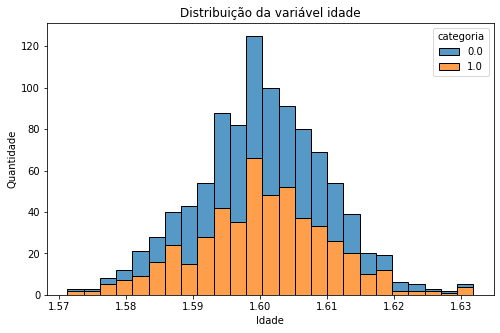

In [17]:
# tamanho do plot
plt.figure(figsize=(8,5))

# título do plot
plt.title('Distribuição da variável idade')

# Nomes dos eixos
# eixo x
plt.xlabel('Idade')
# eixo y
plt.ylabel('Quantidade')

sns.histplot(data=df, x='altura', hue='categoria', multiple="stack");

#### HISTOGRAMA COM A FUNÇÃO STEP

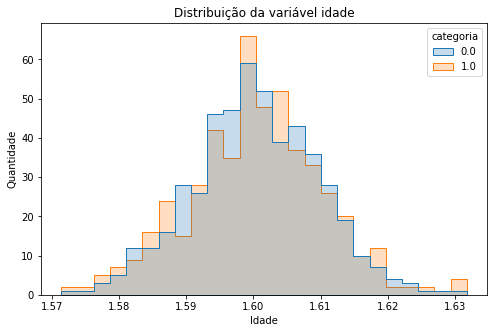

In [18]:
# tamanho do plot
plt.figure(figsize=(8,5))

# título do plot
plt.title('Distribuição da variável idade')

# Nomes dos eixos
# eixo x
plt.xlabel('Idade')
# eixo y
plt.ylabel('Quantidade')

sns.histplot(data=df, x='altura', hue='categoria', element="step");

## 1.2. SCATTER PLOT

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

O scatter plot retrata a distribuição conjunta de duas variáveis, a sua exibição é feita <br>
por meio de uma 'nuvem' de pontos, no qual cada ponto representa uma observação do dataset.

### SIMPLES

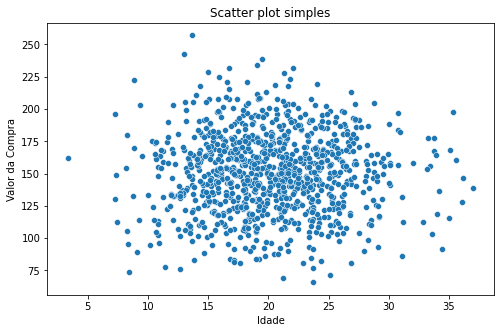

In [19]:
# tamanho do plot
plt.figure(figsize=(8,5))

# título do plot
plt.title('Scatter plot simples')

# Nomes dos eixos
# eixo x
plt.xlabel('Idade')
# eixo y
plt.ylabel('Valor da Compra')

sns.scatterplot(data=df, x='idade', y='valor_compra');

### Com Categorias

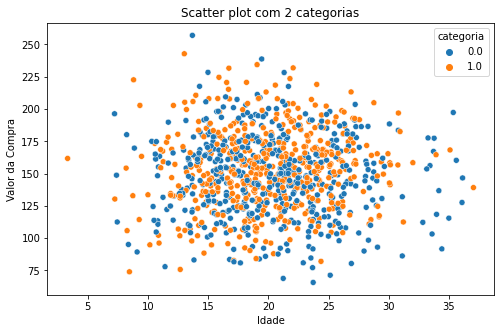

In [20]:
# tamanho do plot
plt.figure(figsize=(8,5))

# título do plot
plt.title('Scatter plot com 2 categorias')

# Nomes dos eixos
# eixo x
plt.xlabel('Idade')
# eixo y
plt.ylabel('Valor da Compra')

sns.scatterplot(data=df, x='idade', y='valor_compra', hue='categoria');

## 1.3. LINEPLOT

https://seaborn.pydata.org/generated/seaborn.lineplot.html 

Bom para exibir o comportamento de uma variável ao longo do tempo.

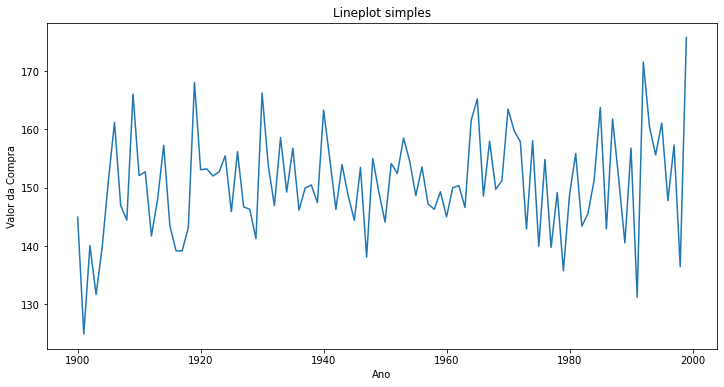

In [21]:
# tamanho do plot
plt.figure(figsize=(12,6))

# título do plot
plt.title('Lineplot simples')

# Nomes dos eixos
# eixo x
plt.xlabel('Ano')
# eixo y
plt.ylabel('Valor da Compra')

aux = df.groupby('ano').mean()
sns.lineplot(data=aux, x='ano', y='valor_compra' );

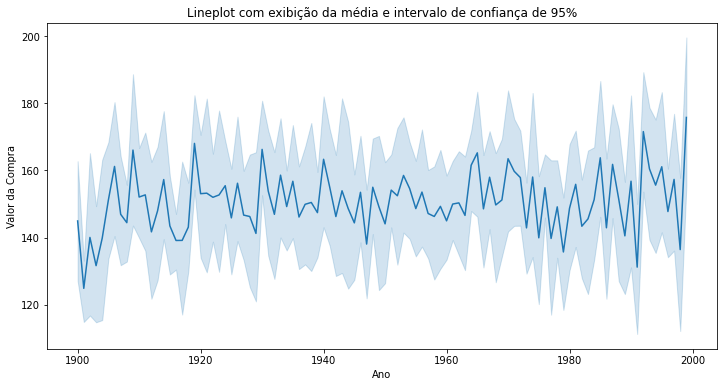

In [22]:
# tamanho do plot
plt.figure(figsize=(12,6))

# título do plot
plt.title('Lineplot com exibição da média e intervalo de confiança de 95%')

# Nomes dos eixos
# eixo x
plt.xlabel('Ano')
# eixo y
plt.ylabel('Valor da Compra')

sns.lineplot(data=df, x='ano', y='valor_compra');

# 2. VARIÁVEIS CATEGÓRICAS

## 2.1. GRÁFICOS DE ESTIMATIVA CATEGÓRICA

São gráficos que geralmente exibem o valor médio dos dados e um intervalo de confiança.

### BARPLOT

https://seaborn.pydata.org/generated/seaborn.barplot.html

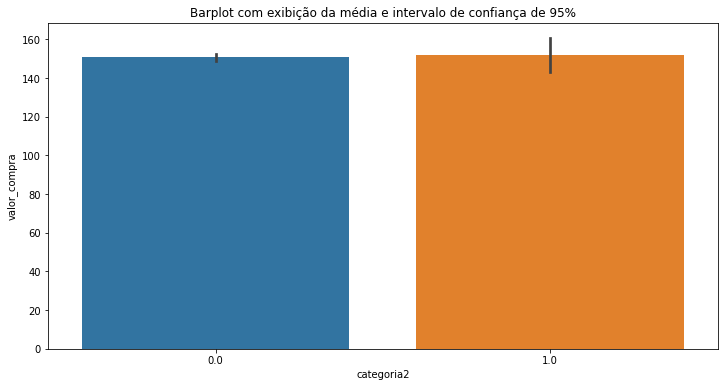

In [73]:
# tamanho do plot
plt.figure(figsize=(12,6))

# título do plot
plt.title('Barplot com exibição da média e intervalo de confiança de 95%')

# Nomes dos eixos
# eixo x
plt.xlabel('Categoria2')
# eixo y
plt.ylabel('Valor da Compra')

sns.barplot(x='categoria2', y='valor_compra', data=df);

### POINT PLOT

https://seaborn.pydata.org/generated/seaborn.pointplot.html

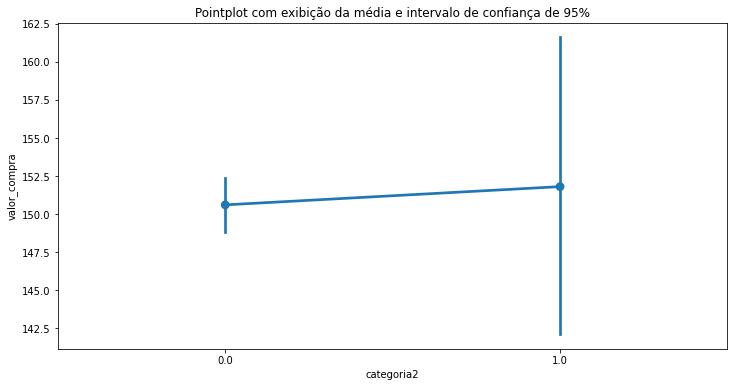

In [60]:
# tamanho do plot
plt.figure(figsize=(12,6))

# título do plot
plt.title('Pointplot com exibição da média e intervalo de confiança de 95%')

# Nomes dos eixos
# eixo x
plt.xlabel('Categoria2')
# eixo y
plt.ylabel('Valor da Compra')

sns.pointplot(x='categoria2', y='valor_compra', data=df);

### COUNT PLOT

https://seaborn.pydata.org/generated/seaborn.countplot.html

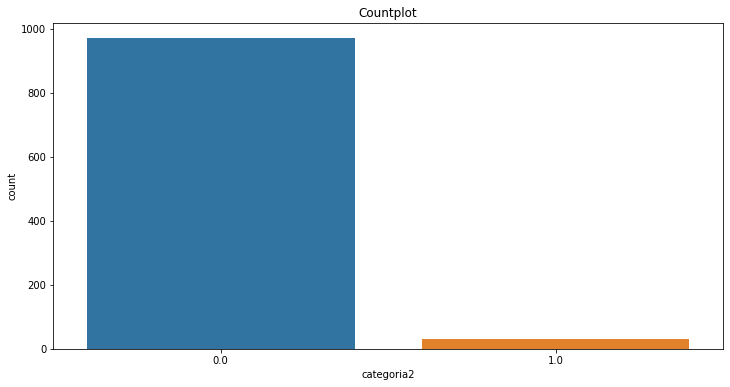

In [75]:
# tamanho do plot
plt.figure(figsize=(12,6))

# título do plot
plt.title('Countplot')

# Nomes dos eixos
# eixo x
plt.xlabel('Ano')
# eixo y
plt.ylabel('Valor da Compra')

sns.countplot(x='categoria2', data=df);

## 2.2. GRÁFICO DE DISTRIBUIÇÃO CATEGÓRICA

### VIOLIN PLOT

https://seaborn.pydata.org/generated/seaborn.violinplot.html

A combination of boxplot and kernel density estimation.



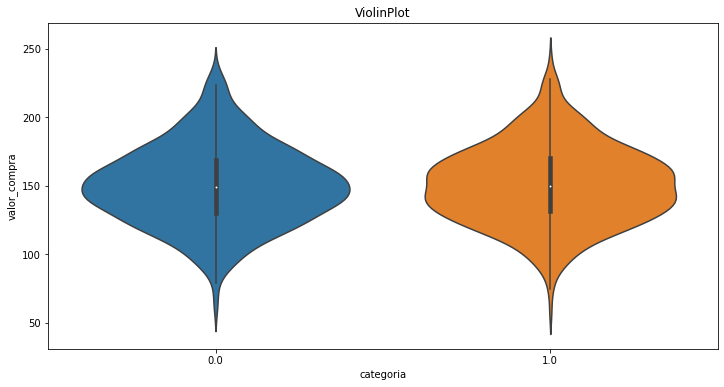

In [51]:
# tamanho do plot
plt.figure(figsize=(12,6))

# título do plot
plt.title('ViolinPlot')

# Nomes dos eixos
# eixo x
plt.xlabel('Ano')
# eixo y
plt.ylabel('Valor da Compra')

sns.violinplot(x='categoria', y='valor_compra', data=df);

### BOXPLOT

https://seaborn.pydata.org/generated/seaborn.boxplot.html

A traditional box-and-whisker plot with a similar API.



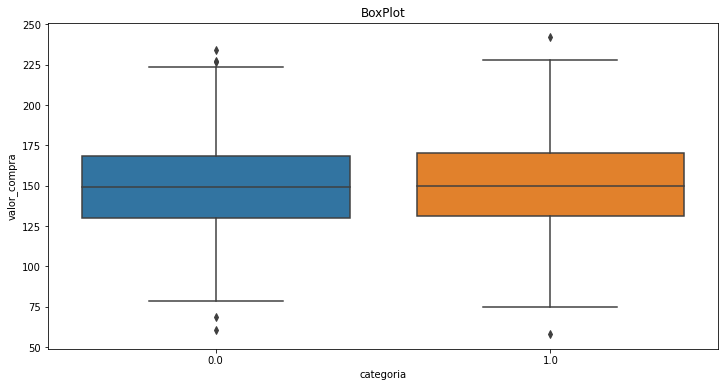

In [54]:
# tamanho do plot
plt.figure(figsize=(12,6))

# título do plot
plt.title('BoxPlot')

# Nomes dos eixos
# eixo x
plt.xlabel('Ano')
# eixo y
plt.ylabel('Valor da Compra')

sns.boxplot(x='categoria', y='valor_compra', data=df);

## 2.3. SCATTERPLOT CATEGÓRICO

### SWARM PLOT

https://seaborn.pydata.org/generated/seaborn.swarmplot.html

Um Scatterplot categórico no qual os pontos não se sobrepõem.

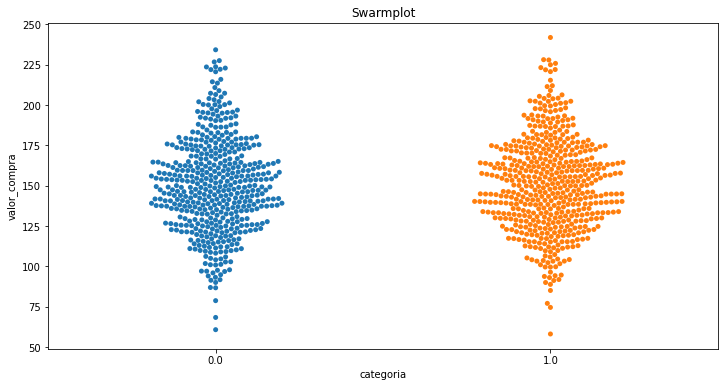

In [80]:
# tamanho do plot
plt.figure(figsize=(12,6))

# título do plot
plt.title('Swarmplot')

# Nomes dos eixos
# eixo x
plt.xlabel('Ano')
# eixo y
plt.ylabel('Valor da Compra')

sns.swarmplot(x='categoria', y='valor_compra', data=df);